# Multilayer Perceptron Training

## Python Imports

In [2]:
import pickle

import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from ML.Moderation.notebooks.utilities import data, ml_stats, sampling
from ML.Moderation.notebooks.utilities import train_test_split as tts
from ML.Moderation.notebooks.utilities import vectorize
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

## Load Data

In [2]:
df = data.neutral()

In [3]:
df_sampled = sampling.undersample(df)

## Training Function

In [4]:
def mlp(
    X_train, y_train, X_test, y_test, name, class_weight=None, epochs=15, batch_size=64,
):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(y_train.shape[1], activation="softmax"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()

    history = model.fit(
        X_train,
        y_train,
        class_weight=class_weight,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
    )
    print(model.evaluate(X_train, y_train))
    model.save(f"../../models/neutral_models/{name}")
    return np.argmax(model.predict(X_test), axis=1), model, history

## TF-IDF Vectorizer

### Vectorization

In [5]:
tfidf_vec, vocab = vectorize.tfidf(
    df_sampled["text"], "mlp", max_df=0.9, min_df=50, vocab=True
)

Time to vectorize:  20.24
Length of vocabulary: 5567


### Train-Test Splits

In [6]:
y = tts.encode_outputs(df_sampled["class"])

In [7]:
X_train, X_test, y_train, y_test = tts.split(tfidf_vec, y)

### Training

In [8]:
y_pred, model, history = mlp(X_train, y_train, X_test, y_test, "mlp_tfidf", epochs=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                356352    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 361,050
Trainable params: 361,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1128/1128 [==============================] - 5s 4ms/step - loss: 0.3552 - accuracy: 0.8280 - val_loss: 0.2144 - val_accuracy: 0.9152
Epoch 2/2
2255/2255 [==============================] - 3s 1ms/step - loss: 0.1516 - accuracy: 0.9421
[0.1

### Metrics

In [9]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9436479929422144
Class 1 Accuracy: 0.8940796075370722


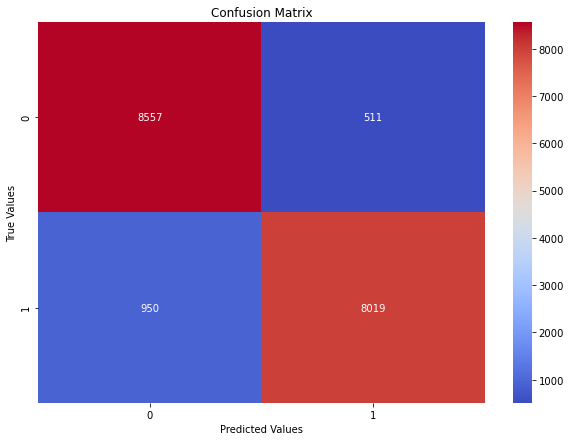

In [10]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [11]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.92

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.92
Macro Recall: 0.92
Macro F1-score: 0.92

Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score: 0.92

Classification Report

              precision    recall  f1-score   support

     Class 0       0.90      0.94      0.92      9068
     Class 1       0.94      0.89      0.92      8969

    accuracy                           0.92     18037
   macro avg       0.92      0.92      0.92     18037
weighted avg       0.92      0.92      0.92     18037



### Personal Test

In [21]:
vocab_tfidf = pickle.load(
    open("../../models/neutral_models/vectorizers/mlp_tfidf_features.pkl", "rb")
)
transformer = TfidfTransformer()
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=vocab_tfidf)
test_tfidf = transformer.fit_transform(
    loaded_vec.fit_transform(
        np.array(
            [
                "what are you a homo",
                "I love you",
                "I go to the mall",
                "fuck your mom bitch",
                "hello",
                "I have food",
                "you are gay as fuck",
                "niggers",
                "blessjesus",
            ]
        )
    )
)
preds = model.predict(test_tfidf.toarray())
print(preds.argmax(axis=1))
print(preds)

[1 0 0 1 0 0 1 0 0]
[[7.2712544e-03 9.9272883e-01]
 [6.0017115e-01 3.9982882e-01]
 [7.7812964e-01 2.2187038e-01]
 [9.9325658e-14 1.0000000e+00]
 [9.9824226e-01 1.7578045e-03]
 [9.9660313e-01 3.3968461e-03]
 [1.0698243e-13 1.0000000e+00]
 [9.9111009e-01 8.8898716e-03]
 [9.9111009e-01 8.8898726e-03]]


## Count Vectorizer

### Vectorization

In [12]:
count_vec, vocab = vectorize.count(
    df_sampled["text"], "mlp", max_df=0.9, min_df=50, vocab=True
)

Time to vectorize:  19.93
Length of vocabulary: 5567


### Train-Test-Splits

In [13]:
X_train, X_test, y_train, y_test = tts.split(count_vec, y)

### Training

In [14]:
y_pred, model, history = mlp(X_train, y_train, X_test, y_test, "mlp_count", epochs=3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                356352    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 18        
Total params: 361,050
Trainable params: 361,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1128/1128 [==============================] - 4s 3ms/step - loss: 0.3462 - accuracy: 0.8601 - val_loss: 0.2124 - val_accuracy: 0.9181
Epoch 2/3
1128/1128 [==============================] - 3s 2ms/step - loss: 0.1575 - accuracy: 0.9386 - 

### Metrics

In [15]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9197176885752095
Class 1 Accuracy: 0.9101349091314528


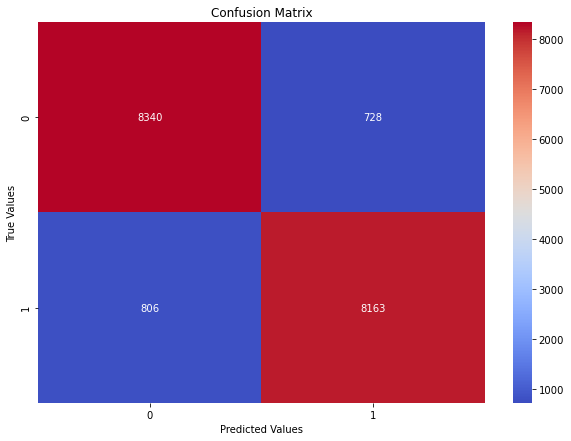

In [16]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [17]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.91

Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.91
Macro Recall: 0.91
Macro F1-score: 0.91

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.91

Classification Report

              precision    recall  f1-score   support

     Class 0       0.91      0.92      0.92      9068
     Class 1       0.92      0.91      0.91      8969

    accuracy                           0.91     18037
   macro avg       0.91      0.91      0.91     18037
weighted avg       0.91      0.91      0.91     18037



### Personal Test

In [6]:
vocab_tfidf = pickle.load(
    open("../../models/neutral_models/vectorizers/mlp_count_features.pkl", "rb")
)
loaded_vec = CountVectorizer(decode_error="replace", vocabulary=vocab_tfidf)
test_count = loaded_vec.fit_transform(
    np.array(
        [
            "what are you a homo",
            "I love you",
            "I go to the mall",
            "fuck your mom bitch",
            "hello",
            "I have food",
            "you are gay as fuck",
            "niggers",
            "blessjesus",
        ]
    )
)
from tensorflow import keras
model = keras.models.load_model("../../models/neutral_models/mlp_tfidf")
preds = model.predict(test_count.toarray())
print(preds.argmax(axis=1))
print(preds)

[1 1 1 1 0 0 1 0 0]
[[7.6198700e-07 9.9999928e-01]
 [1.3943405e-02 9.8605657e-01]
 [7.8868851e-02 9.2113119e-01]
 [1.1707316e-34 1.0000000e+00]
 [9.9406612e-01 5.9338300e-03]
 [9.8527992e-01 1.4720070e-02]
 [5.7450031e-35 1.0000000e+00]
 [9.8638123e-01 1.3618825e-02]
 [9.8638123e-01 1.3618825e-02]]
